Import 

In [153]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

Franke Function

In [154]:
def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

Create design matrix for for two dimensions

In [155]:
def create_X(x, y, n):
    #n is the order of the polynomial, in this project it will be 5
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)
    N = len(x)
    p = int((n+1)*(n+2)/2)  #Number of elements in beta, 
    X = np.ones((N, p))
    
    for i in range(1,n+1):
        q = int(i*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    
    return X

R2 score function

In [156]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

Mean Squared Error (MSE)

In [157]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

Make design matrix

In [158]:
n = 100 #size of x and y
N = 5 #polynomial degree

x = np.random.uniform(0,1,n)
y = np.random.uniform(0,1,n)

z = FrankeFunction(x,y)

X = create_X(x, y, N)

DesignMatrix = pd.DataFrame(X)
display(DesignMatrix)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.009594,0.142130,0.000092,0.001364,0.020201,8.830369e-07,0.000013,0.000194,0.002871,...,1.255064e-07,0.000002,0.000028,4.080829e-04,8.127646e-11,1.204090e-09,1.783828e-08,2.642696e-07,3.915087e-06,5.800100e-05
1,1.0,0.950301,0.261001,0.903072,0.248029,0.068121,8.581900e-01,0.235702,0.064736,0.017780,...,2.239881e-01,0.061518,0.016896,4.640513e-03,7.750072e-01,2.128561e-01,5.846102e-02,1.605635e-02,4.409883e-03,1.211177e-03
2,1.0,0.177365,0.609673,0.031458,0.108134,0.371701,5.579567e-03,0.019179,0.065927,0.226616,...,3.401712e-03,0.011693,0.040194,1.381619e-01,1.755231e-04,6.033432e-04,2.073933e-03,7.128939e-03,2.450502e-02,8.423360e-02
3,1.0,0.278901,0.863965,0.077786,0.240960,0.746436,2.169443e-02,0.067204,0.208181,0.644895,...,1.874323e-02,0.058062,0.179861,5.571665e-01,1.687513e-03,5.227499e-03,1.619350e-02,5.016348e-02,1.553941e-01,4.813725e-01
4,1.0,0.321438,0.774922,0.103323,0.249089,0.600503,3.321184e-02,0.080067,0.193025,0.465343,...,2.573657e-02,0.062046,0.149579,3.606043e-01,3.431533e-03,8.272718e-03,1.994382e-02,4.808044e-02,1.159120e-01,2.794400e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.285082,0.023155,0.081272,0.006601,0.000536,2.316907e-02,0.001882,0.000153,0.000012,...,5.364874e-04,0.000044,0.000004,2.874774e-07,1.882989e-03,1.529428e-04,1.242254e-05,1.009002e-06,8.195459e-08,6.656634e-09
96,1.0,0.603515,0.019603,0.364231,0.011831,0.000384,2.198189e-01,0.007140,0.000232,0.000008,...,4.309120e-03,0.000140,0.000005,1.476707e-07,8.006480e-02,2.600620e-03,8.447189e-05,2.743769e-06,8.912156e-08,2.894797e-09
97,1.0,0.104012,0.252768,0.010819,0.026291,0.063892,1.125262e-03,0.002735,0.006646,0.016150,...,2.844304e-04,0.000691,0.001680,4.082154e-03,1.217370e-05,2.958425e-05,7.189494e-05,1.747174e-04,4.245941e-04,1.031838e-03
98,1.0,0.946166,0.587008,0.895230,0.555407,0.344578,8.470364e-01,0.525507,0.326028,0.202270,...,4.972171e-01,0.308477,0.191381,1.187342e-01,7.582926e-01,4.704500e-01,2.918704e-01,1.810784e-01,1.123423e-01,6.969795e-02


Perform the Ordinary Least Square (OLS) method

In [188]:
X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train

z_tilde = X_train @ beta
print("Training R2")
print(R2(z_train,z_tilde))
print("Training MSE")
print(MSE(z_train,z_tilde))
z_predict = X_test @ beta
print("Test R2")
print(R2(z_test,z_predict))
print("Test MSE")
print(MSE(z_test,z_predict))

Training R2
0.9943799422477095
Training MSE
0.0004076591434778494
Test R2
0.9754091992204603
Test MSE
0.0025827760881143736


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


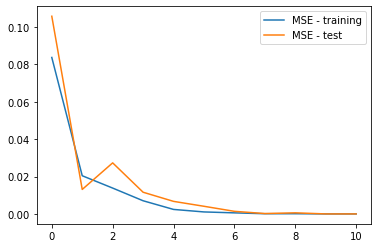

In [205]:
max_degree = 10
n = 100
degree = np.linspace(0, max_degree, max_degree+1)
MSE_test = np.zeros(max_degree+1)
MSE_train = np.zeros(max_degree+1)

for i in range(max_degree-1):
    N = i #polynomial degree

    x = np.random.uniform(0,1,n)
    y = np.random.uniform(0,1,n)
    z = FrankeFunction(x,y)
    X = create_X(x, y, N)
    
    X_train, X_test, z_train, z_test = train_test_split(X,z,test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
    z_tilde = X_train @ beta
    z_predict = X_test @ beta
    MSE_train[i] = MSE(z_train,z_tilde)
    #print(MSE(z_train,z_tilde))
    MSE_test[i] = MSE(z_test,z_predict)
    
plt.plot(degree, MSE_train, label='MSE - training')
plt.plot(degree, MSE_test, label='MSE - test')
plt.legend()
plt.show()



